In [14]:
import pandas as pd
import matplotlib.pyplot as plt 


In [3]:
df_train = pd.read_csv("data/train.csv")

In [4]:
df_train 


,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,0,Jansport,Leather,Medium,7.0,Yes,No,Tote,Black,11.611723,112.15875
1,1,Jansport,Canvas,Small,10.0,Yes,Yes,Messenger,Green,27.078537,68.88056
2,2,Under Armour,Leather,Small,2.0,Yes,No,Messenger,Red,16.643760,39.17320
3,3,Nike,Nylon,Small,8.0,Yes,No,Messenger,Green,12.937220,80.60793
4,4,Adidas,Canvas,Medium,1.0,Yes,Yes,Messenger,Green,17.749338,86.02312
...,...,...,...,...,...,...,...,...,...,...,...
299995,299995,Adidas,Leather,Small,9.0,No,No,Tote,Blue,12.730812,129.99749
299996,299996,Jansport,Leather,Large,6.0,No,Yes,Tote,Blue,26.633182,19.85819
299997,299997,Puma,Canvas,Large,9.0,Yes,Yes,Backpack,Pink,11.898250,111.41364
299998,299998,Adidas,Nylon,Small,1.0,No,Yes,Tote,Pink,6.175738,115.89080


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    300000 non-null  int64  
 1   Brand                 290295 non-null  object 
 2   Material              291653 non-null  object 
 3   Size                  293405 non-null  object 
 4   Compartments          300000 non-null  float64
 5   Laptop Compartment    292556 non-null  object 
 6   Waterproof            292950 non-null  object 
 7   Style                 292030 non-null  object 
 8   Color                 290050 non-null  object 
 9   Weight Capacity (kg)  299862 non-null  float64
 10  Price                 300000 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 25.2+ MB


In [10]:
print("col : num unique vals")
print("-" * 20)
for col in df_train:
    print(col, df_train[col].nunique())

col : num unique vals
--------------------
id 300000
Brand 5
Material 4
Size 3
Compartments 10
Laptop Compartment 2
Waterproof 2
Style 3
Color 6
Weight Capacity (kg) 181596
Price 48212


In [13]:
categorical_columns = []

for col in df_train:
    if df_train[col].nunique() < 11:
        print(col)
        print(df_train[col].unique())
        print("-" * 10)
        
        categorical_columns.append(col)

Brand
['Jansport' 'Under Armour' 'Nike' 'Adidas' 'Puma' nan]
----------
Material
['Leather' 'Canvas' 'Nylon' nan 'Polyester']
----------
Size
['Medium' 'Small' 'Large' nan]
----------
Compartments
[ 7. 10.  2.  8.  1.  3.  5.  9.  6.  4.]
----------
Laptop Compartment
['Yes' 'No' nan]
----------
Waterproof
['No' 'Yes' nan]
----------
Style
['Tote' 'Messenger' nan 'Backpack']
----------
Color
['Black' 'Green' 'Red' 'Blue' 'Gray' 'Pink' nan]
----------


In [16]:
?plt.bar

In [30]:
df_train["Color"].value_counts().values

array([51690, 50280, 48097, 47219, 46386, 46378])

In [33]:
df_train["Color"].value_counts(dropna=False)

Color
Pink     51690
Gray     50280
Blue     48097
Red      47219
Green    46386
Black    46378
NaN       9950
Name: count, dtype: int64

In [32]:
?df_train.value_counts

In [28]:
df_train["Color"].value_counts().keys()

Index(['Pink', 'Gray', 'Blue', 'Red', 'Green', 'Black'], dtype='object', name='Color')

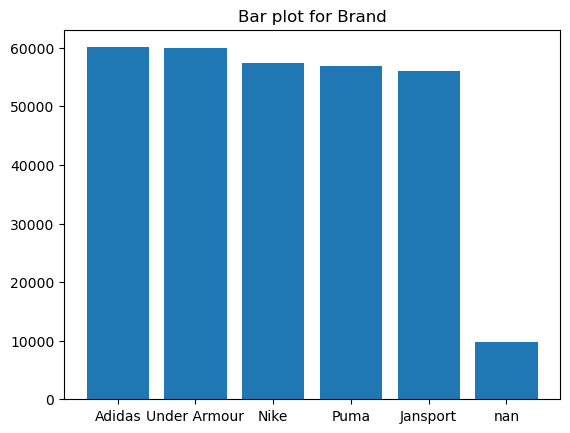

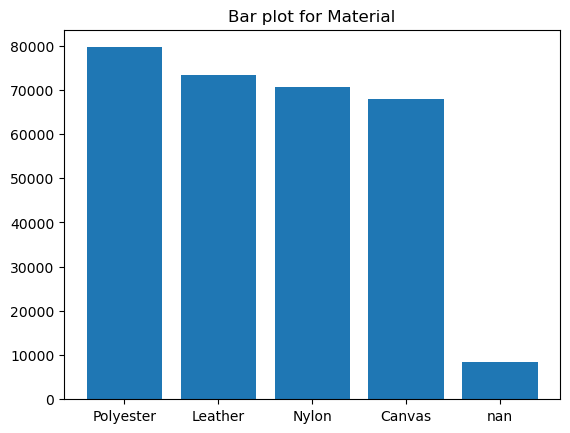

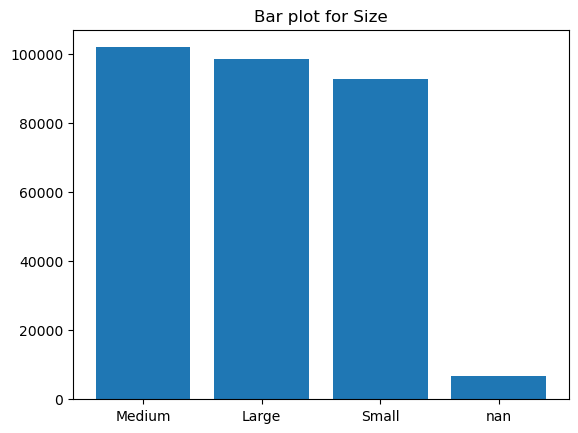

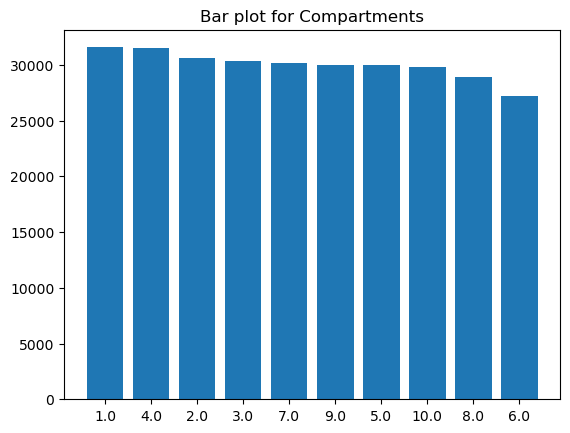

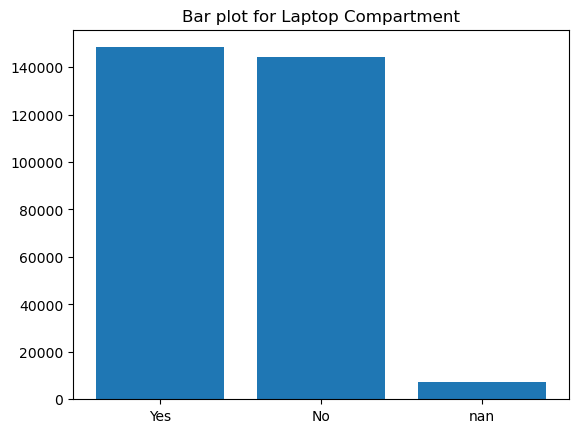

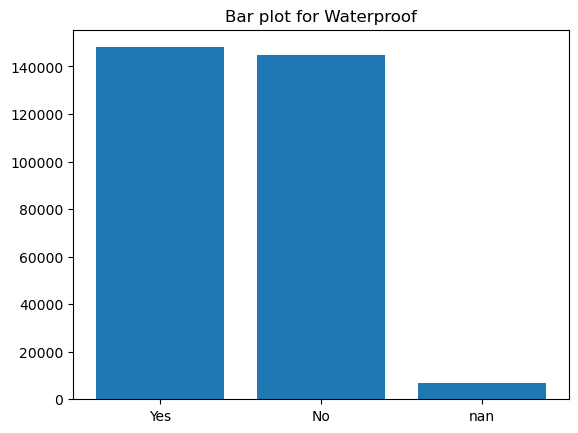

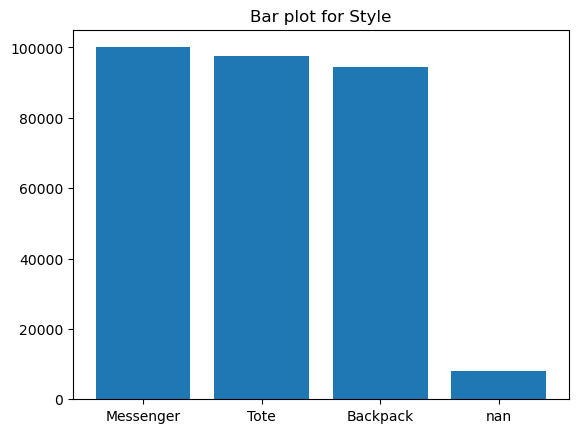

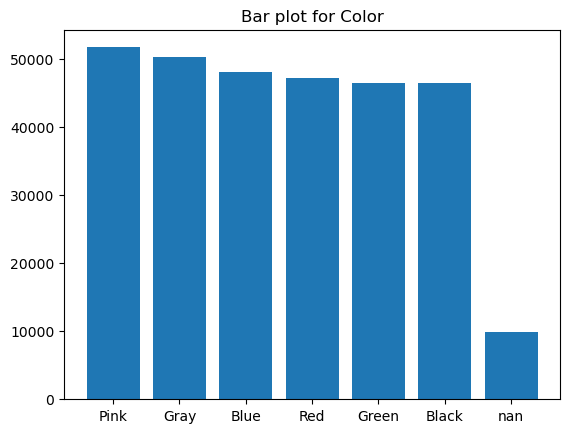

In [37]:
for col in categorical_columns:
    plt.figure()
    
    plt.bar(
        x = df_train[col].value_counts(dropna=False).index.astype(str),
        height = df_train[col].value_counts(dropna=False).values)
    plt.title(f"Bar plot for {col}")
    
    plt.show()

In [38]:
print(df_train.columns)

Index(['id', 'Brand', 'Material', 'Size', 'Compartments', 'Laptop Compartment',
       'Waterproof', 'Style', 'Color', 'Weight Capacity (kg)', 'Price'],
      dtype='object')


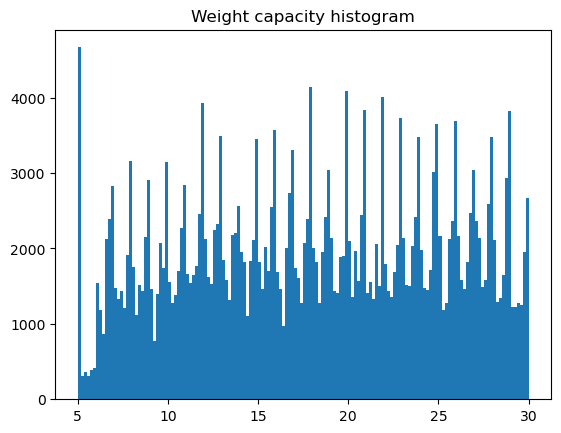

In [41]:
plt.figure()

plt.hist(df_train['Weight Capacity (kg)'], bins=150)
plt.title("Weight capacity histogram")

plt.show()

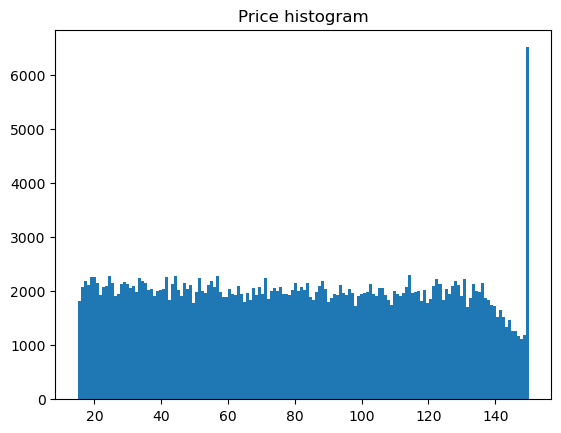

In [43]:
plt.figure()

plt.hist(df_train.Price, bins=150)
plt.title("Price histogram")

plt.show()

In [58]:
print(df_train.Price.describe())

print( 
    f"""
    The max bag price is 150 this makes up 
    {round(100 * len(df_train[df_train.Price == 150]) / len(df_train), 2)}%
    of rows. The average unique price makes up 
    {round(100 / df_train.Price.nunique(), 3)}%
    of rows. 
    
    There are {len(df_train[df_train.Price == 150])} rows that cost the max
    """)


count    300000.000000
mean         81.411107
std          39.039340
min          15.000000
25%          47.384620
50%          80.956120
75%         115.018160
max         150.000000
Name: Price, dtype: float64

    The max bag price is 150 this makes up 
    1.84%
    of rows. The average unique price makes up 
    0.002%
    of rows. 
    
    There are 5528 rows that cost the max
    


### Initial Takeaways

Categorical and numerical variables are mostly evenly distributed. 

There are lots of rows with the maximum price of 150, not too sure how to deal with this yet. Potentially training a classification model to classify bags as being the max price could be a good solution.

All categorical variables have missing values. Tests should be run to determine the type of missingness so they can be dealt with properly. 

I expect high dependency between categorical variables which should be accounted for when building models that deal badly with this.